In [87]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Sprawozdanie z zadania nr 1 - PyAge
Maksymilian Wojczuk, 3 rok
## repozytorium z rozwiązaniem: https://github.com/maxiwoj/pyage

Jako rozwiązanie zadania domowego wybrałem problem TSP - obliczenie optymalej drogi dla 50 punktów rozmieszczonych w dwuwymiarowym układzie współrzędnych 1000x1000. 
##### Genotyp
Jako genotyp wykorzystałem kolejność odwiedzenia miast, z której w prosty sposób można było obliczyć dopasowanie - zakładam, że pomiędzy punktami odległość wyznaczona jest wg miary euklidesowej.
#### Krosowanie
Krosowanie dwóch genotypów zaimplementowałem jako konkatenację fragmentu listy porządku odwiedzanych punktów z jednego genotypu wstawionego na początek listy porządku drugiego genotypu (uprzednio usuwając elementy wybranego fragmentu z listy drugiego genotypu)
#### Mutacja 
Zaimplementowałem 3 mutacje:
- inverse - zmiana ścieżki poprzez odwrócenie ścieżki pomiędzy dwoma elementami:

    x=2, y=6 

    [0,1,2,3,4,5,6] -> [0,1,2,5,4,3,6]


- random - zamiana kolejności losowych punktów występujących w ścieżce:

    x=2, y=6

    [0,1,2,3,4,5,6] -> [0,1,6,3,4,5,2]


- consecutive - zamiana kolejności punktów występujących po sobie w ścieżce:

    x=2, y=x+1

    [0,1,2,3,4,5,6] -> [0,1,3,2,4,5,6]

# Funkcje pomocnicze, odczytanie wyników

## Rename output files 

In [113]:
directory = "./data/"
for filename in os.listdir(directory):
    splitted = filename.split("_")
    new_name =  directory + "_".join(splitted[:3]) + ".csv"
    os.rename(directory + filename, new_name)

## Read output files

In [114]:
files = {}
directory = "./data/"
for filename in os.listdir(directory):
    files[filename[:-4]] = pd.read_csv(directory + filename)

## Plot function

In [115]:
def compare_fitness(condition, naming=lambda name: name):
    for name in files:
        if condition(name):
            plt.plot(files[name]["best_fitness"].tolist(), label=naming(name))
    plt.legend()
    plt.xlabel('fitness')
    plt.ylabel('step')
    plt.show()

# Porównanie wyników

## Porównanie ze względu na prawdopodobieństwo

#### EMAS oraz mutacja losowa

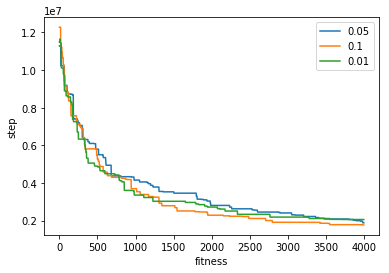

In [116]:
compare_fitness(lambda name: "EMAS" in name and "random" in name, lambda name: name.split("_")[1])

#### EMAS oraz mutacja postępowa

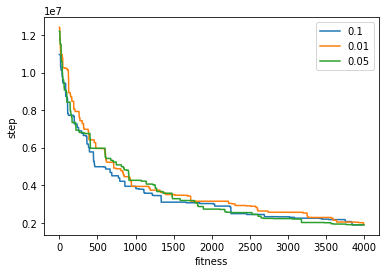

In [117]:
compare_fitness(lambda name: "EMAS" in name and "consecutive" in name, lambda name: name.split("_")[1])

#### EMAS oraz mutacja odwrotna (inverse)

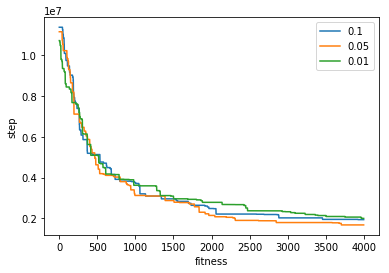

In [118]:
compare_fitness(lambda name: "EMAS" in name and "inverse" in name, lambda name: name.split("_")[1])

#### model ewolucyjny oraz mutacja losowa

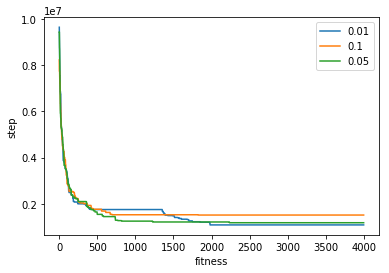

In [119]:
compare_fitness(lambda name: "EVO" in name and "random" in name, lambda name: name.split("_")[1])

#### model ewolucyjny oraz mutacja postępowa

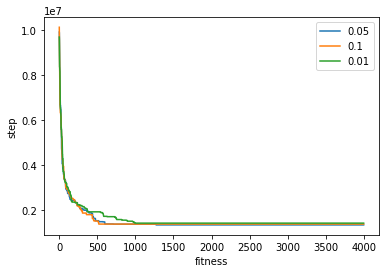

In [120]:
compare_fitness(lambda name: "EVO" in name and "consecutive" in name, lambda name: name.split("_")[1])

#### model ewolucyjny oraz mutacja odwrotna (inverse)

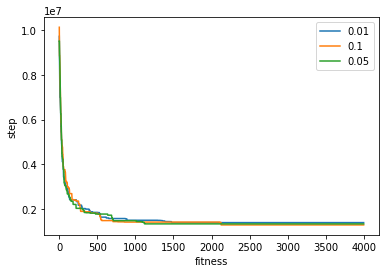

In [121]:
compare_fitness(lambda name: "EVO" in name and "inverse" in name, lambda name: name.split("_")[1])

## Porównanie ze względu na typ mutacji

#### EMAS oraz prawdopodobieństwo: 0.01

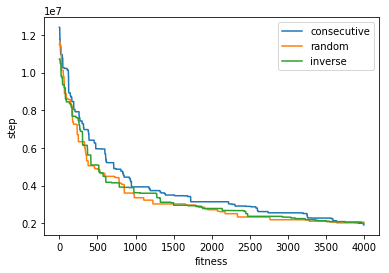

In [122]:
compare_fitness(lambda name: "EMAS" in name and "0.01" in name, lambda name: name.split("_")[2])

#### EMAS oraz prawdopodobieństwo: 0.05

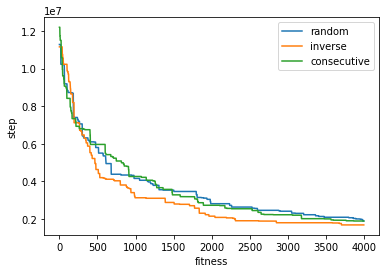

In [123]:
compare_fitness(lambda name: "EMAS" in name and "0.05" in name, lambda name: name.split("_")[2])

#### EMAS oraz prawdopodobieństwo: 0.1

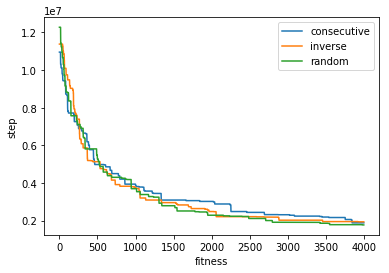

In [124]:
compare_fitness(lambda name: "EMAS" in name and "0.1" in name, lambda name: name.split("_")[2])

#### model ewolucyjny oraz prawdopodobieństwo: 0.01

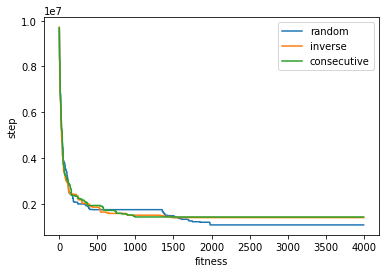

In [125]:
compare_fitness(lambda name: "EVO" in name and "0.01" in name, lambda name: name.split("_")[2])

#### model ewolucyjny oraz prawdopodobieństwo: 0.05

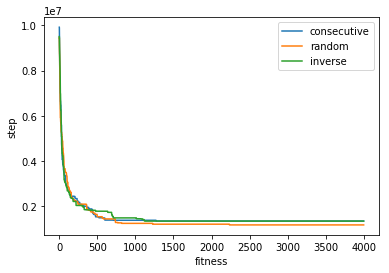

In [126]:
compare_fitness(lambda name: "EVO" in name and "0.05" in name, lambda name: name.split("_")[2])

#### model ewolucyjny oraz prawdopodobieństwo: 0.1

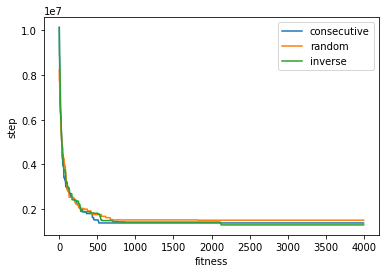

In [127]:
compare_fitness(lambda name: "EVO" in name and "0.1" in name, lambda name: name.split("_")[2])

## Porównanie ze względu na model:

#### prawdopodobieństwo 0.01 oraz losowa mutacja

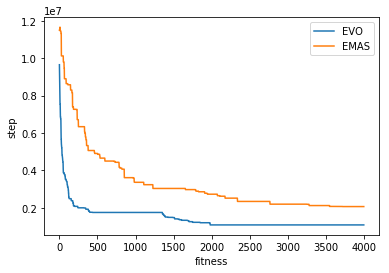

In [128]:
compare_fitness(lambda name: "random" in name and "0.01" in name, lambda name: name.split("_")[0])

#### prawdopodobieństwo 0.01 oraz mutacja postępowa

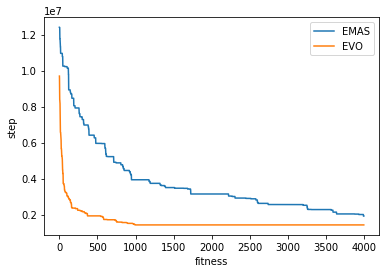

In [129]:
compare_fitness(lambda name: "consecutive" in name and "0.01" in name, lambda name: name.split("_")[0])

#### prawdopodobieństwo 0.01 oraz mutacja odwrotna

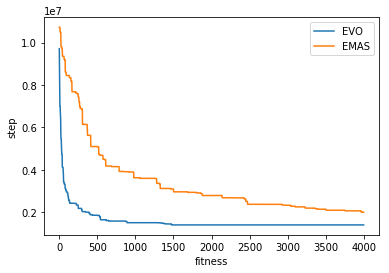

In [130]:
compare_fitness(lambda name: "inverse" in name and "0.01" in name, lambda name: name.split("_")[0])

#### prawdopodobieństwo 0.05 oraz losowa mutacja

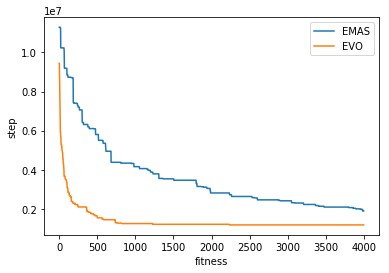

In [131]:
compare_fitness(lambda name: "random" in name and "0.05" in name, lambda name: name.split("_")[0])

#### prawdopodobieństwo 0.05 oraz mutacja postępowa

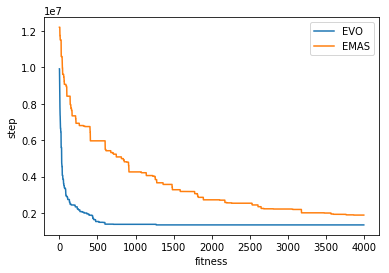

In [132]:
compare_fitness(lambda name: "consecutive" in name and "0.05" in name, lambda name: name.split("_")[0])

#### prawdopodobieństwo 0.05 oraz mutacja odwrotna

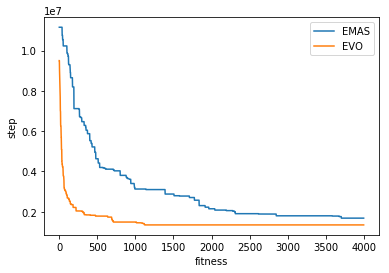

In [133]:
compare_fitness(lambda name: "inverse" in name and "0.05" in name, lambda name: name.split("_")[0])

#### prawdopodobieństwo 0.1 oraz losowa mutacja

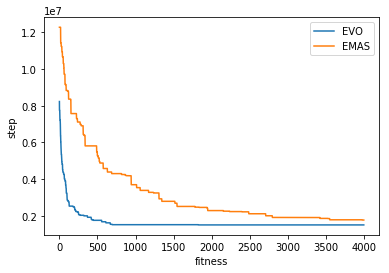

In [134]:
compare_fitness(lambda name: "random" in name and "0.1" in name, lambda name: name.split("_")[0])

#### prawdopodobieństwo 0.1 oraz mutacja postępowa

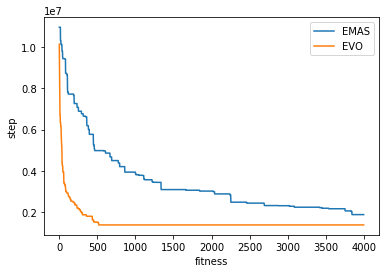

In [135]:
compare_fitness(lambda name: "consecutive" in name and "0.1" in name, lambda name: name.split("_")[0])

#### prawdopodobieństwo 0.1 oraz mutacja odwrotna

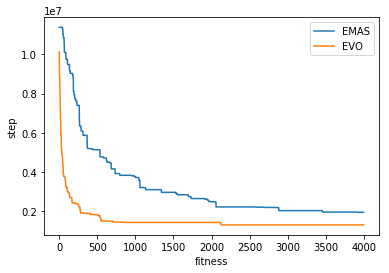

In [136]:
compare_fitness(lambda name: "inverse" in name and "0.1" in name, lambda name: name.split("_")[0])

# Wnioski

- Algorytm ewolucyjny dla wszystkich parametrów okazał się szybciej zbieżny i uzyskał lepsze wyniki
- z reguły (oczywiście z wyjątkami) najlepsza okazywała się mutacja wykorzystująca odwrócenie ścieżki (szczególnie przy wykorzystaniu modelu EMAS)
- w przeważającej ilości przypadków zwiększenie prawdopodobieństwa mutacji polepszało zbieżność i wynik (nieznacznie)
- Dobór prawdopodobieństwa mutacji miał najmniejsze znaczenie przy wykorzystaniu modelu ewolucyjnego - wyniki były szybko zbieżne i pośrednie wartość niewiele się różniły pomiędzy testowanymi wartościami prawdopodobieństwa